#### Logistic Regression using Newton's method as the minimization technique
Newton's Method: ${\theta = \theta - \frac{f'(\theta)} {f''(\theta)}}$ , where ${f(\theta) = \sum{y^{i} * h(\theta) + (1 - y^{i}) * (1 - h(\theta))}}$ and finally ${h(\theta) = \sigma(\theta'x) = \frac{1}{1 + e^{-\theta'x}}}$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math

In [4]:
datax = np.loadtxt('q1x.dat.txt')
y = np.loadtxt('q1y.dat.txt')

# no of training examples
m = y.shape[0]
X = np.concatenate((np.ones((m, 1)), datax), axis=1)
# number of dimensions
n = X.shape[1]

In [21]:
def H(X, W):
    xw = X.dot(W)
    return 1.0 / (1 + np.exp(-xw))

In [22]:
def CalcObj(X, Y, W):
    return Y.dot(np.log(H(X, W))) + (1 - Y).dot(np.log(1 - H(X, W)))

In [23]:
def Grad(X, Y, W):
    return (Y - H(X, W)).dot(X)

In [24]:
def Hessian(X, W):
    # First Upscale the hypothesis and the 1 - hypothesis actually convert them into diagonal matrices
    H_mat = H(X,W) * np.eye(X.shape[0])
    H1_mat = (1 - H(X, W)) * np.eye(X.shape[0])
    term1 = X.T.dot(H_mat)
    term2 = H1_mat.dot(X)
    return (-1)*term1.dot(term2)

In [25]:
def update_params(X, Y, W):
    hessian = Hessian(X, W)
    grad = Grad(X, Y, W)
    return W - np.linalg.inv(hessian).dot(grad)

In [26]:
def check_convergence(newObj, oldObj, tol):
    if np.abs(newObj - oldObj) <= tol:
        return True
    else:
        return False

In [56]:
def newtons_method(X, Y):
    W = np.zeros((X.shape[1]))
    i = 0
    while True:
        oldObj = CalcObj(X, Y, W)
        W = update_params(X, Y, W)
        newObj = CalcObj(X, Y, W)
        if check_convergence(oldObj, newObj, tol=0.00001) == True:
            i += 1
            break
        else:
            i += 1
    return W, i

In [57]:
weights, iterations = newtons_method(X, y)
print weights, iterations

[-2.6205116   0.76037154  1.17194674] 6


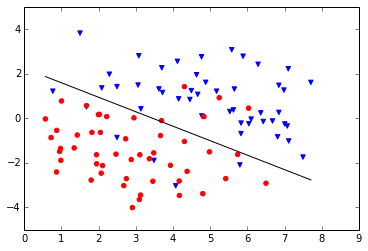

In [58]:
# plotting the graph
x1 = X[y == 1.0]
plt.scatter(x1[:, 1], x1[:, 2], marker='v', color='blue')
x0 = X[y == 0.0]
plt.scatter(x0[:,1], x0[:, 2], marker='o', color='red')

x_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
y_axis = -(weights[0] + weights[1] * x_axis) / weights[2]
plt.plot(x_axis, y_axis, color='black')

#### Weighted Linear Regression using Normal equations

##### Simple Linear Regression or Unweighted Linear Regression

In [123]:
# load the data
X_lin = np.loadtxt('q2x.dat.txt').reshape((100,1))
# add the one per row of the data
m = X_lin.shape[0] # number of training Examples
X = np.concatenate((np.ones((m, 1)), X_lin), axis=1)
p = X_lin.shape[1] # no of features

y = np.loadtxt('q2y.dat.txt')

In [124]:
# find thetas using normal equations
thetas = np.zeros((p))
xtx = X.T.dot(X)
xtxinv = np.linalg.pinv(xtx)
xtxinvxt = xtxinv.dot(X.T)
thetas = xtxinvxt.dot(y)
print thetas

[ 0.32767539  0.17531122]


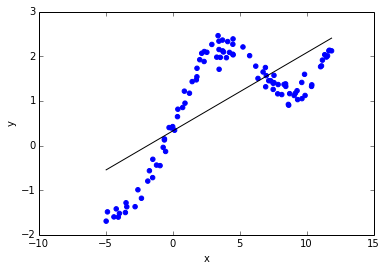

In [126]:
# plotting the best fit line
plt.scatter(X[:,1], y, color='blue')
x_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 1000)
y_axis = (thetas[0] + thetas[1] * x_axis)
plt.plot(x_axis, y_axis, color='black')
plt.xlabel('x')
plt.ylabel('y')

##### Locally weighted Linear regression
Not sure how to get the query point, so I have randomly sampled a point from the datset and then added a standard normal gaussian noise to it. Don't know if this method is right.

In [128]:
X_lin = X_lin.reshape(X_lin.shape[0])
# generate a random point
x = np.sum(X_lin) / X_lin.shape[0]
print x

4.01345933655


In [129]:
# generating the weights for weighted linear regression
thetas = list()
np.seterr(over='ignore')
for tau in [0.1, 0.3, 0.8, 2, 10]:
    diff = x - X[:,1]
    weights = np.exp((-1) * diff / (2.0 * (tau**2)), dtype=np.float64)
    # print weights
    # Coverting the weight matrix to m*m diagonal matrix
    weight_mat = weights * np.eye(weights.shape[0])
    # print weight_mat.shape
    # Finally generating the thetas using the normal equation (X'WX)^-1X'Wy
    theta = (np.linalg.inv(X.T.dot(weight_mat).dot(X)).dot(X.T).dot(weight_mat).dot(y))
    print theta
    thetas.append(theta)

[ 2.9479534  -0.06975046]
[-1.48760022  0.30603801]
[-0.50194247  0.2128226 ]
[ 0.67604719  0.10945327]
[ 0.33996132  0.17229261]


[array([ 2.9479534 , -0.06975046]), array([-1.48760022,  0.30603801]), array([-0.50194247,  0.2128226 ]), array([ 0.67604719,  0.10945327]), array([ 0.33996132,  0.17229261])]
[ 2.9479534  -0.06975046]
[-1.48760022  0.30603801]
[-0.50194247  0.2128226 ]
[ 0.67604719  0.10945327]
[ 0.33996132  0.17229261]


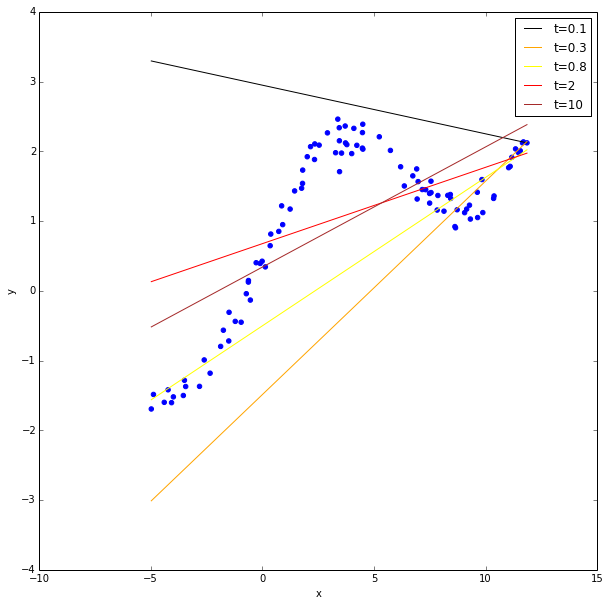

In [130]:
# plotting
plt.figure(figsize=(10, 10))
plt.scatter(X[:,1], y, color='blue')
colors = ['black', 'orange', 'yellow', 'red', 'brown']
tau = [0.1, 0.3, 0.8, 2, 10]
print thetas
x_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)

for theta in range(len(thetas)):
    print thetas[theta]
    y_axis = (thetas[theta][0] + thetas[theta][1] * x_axis)
    s = 't='+str(tau[theta])
    plt.plot(x_axis, y_axis, color=colors[theta],label=s)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Problem 3: GLM's Poisson Responses
##### Part a: Showing  Poisson belongs to exponential family
${P(y) = \frac{e^{-\lambda} \lambda^{y}}{y!}}$

${P(y) = \frac{e^{-\lambda} e^{y  log(\lambda)}}{y!}}$

${P(y) = \frac{e^{y  log(\lambda) - \lambda}}{y!}}$

Comparing with the standard question of the **exponential Family**, we get

${\eta = log(\lambda)}$, ${T(y) = y}$, ${a(\eta) = \lambda}$, ${B(y) = \frac{1}{y!}}$

Now, using the second assumption of GLM's we have,

${E[y;x] = h_\theta(x)}$, expected value for Poss(${\lambda}$) = ${\lambda}$.

${\lambda = h_\theta(x)}$

${e^{\eta} = h_\theta(x)}$, ${e^{\theta'x^{(i)}} = h_\theta(x)}$

##### Part B: Given the data, calculating the log likelihood and the update rule for maximizing the log likelihood
${P(y|x;\theta) = \sum_i log(\frac{e^{-\lambda} \lambda^{y^{(i)}}}{y^{(i)}!})}$

${\sum_i{{log(e^{-\lambda}) + log(\lambda^{y^{(i)}})} - log(y^{(i)}!)}}$

${\sum_i {-\lambda + y^{(i)} log(\lambda) - log(y^{(i)}!)}}$

${\sum_i{-e^{\theta'x^{(i)}} + y^{(i)}\theta'x^{(i)} - log(y^{(i)}!)}}$

To find gradient with respect to some ${\theta_j}$, differentiating the above equation w.r.t to ${\theta_j}$

${\frac{\partial l(\theta)}{\partial \theta_j} = \sum_i{-e^{\theta'x^{(i)}}x^{(i)}_j + y^{(i)}x^{(i)}_j}}$

${\sum_i{x^{(i)}_j(y^{(i)} - e^{\theta'x^{(i)}})}}$

${\frac{\partial l(\theta)}{\partial \theta_j} = \sum_i{x^{(i)}_j(y^{(i)} - h_\theta(x^{(i)}))}}$

So gradient acsent rule is, ${\theta_j = \theta_j + \alpha(\sum_i{x^{(i)}_j(y^{(i)} - h_\theta(x^{(i)}))})}$